In [1]:
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [2]:
Homicide_df_raw = pd.read_csv("Homicides Are Falling Around the World - Homicides Are Falling Around the World.csv")
Homicide_df_raw

,Unnamed: 0,"Intentional homicides (per 100,000 people)",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,country,% change earliest to latest data,1995.00,1996.00,1997.00,1998.00,1999.00,2000.0,2001.0,2002.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,earliest figure,latest figure,source,URL
1,Croatia,-0.75,3.56,2.62,2.55,2.86,2.67,2.3,1.8,1.7,...,1.4,1.1,1.2,1.1,0.8,0.9,3.56,0.90,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
2,Bulgaria,-0.70,5.91,5.29,4.85,4.69,4.05,NaN,NaN,NaN,...,2.0,1.7,1.9,1.5,1.6,1.8,5.91,1.80,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
3,Netherlands,-0.69,1.94,1.36,1.33,1.12,1.29,1.1,1.3,1.2,...,0.9,0.9,0.9,0.7,0.7,0.6,1.94,0.60,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
4,Kazakhstan,-0.69,15.36,16.71,16.67,16.58,15.74,15.5,14.5,13.1,...,8.6,8.6,7.5,6.5,5.2,4.8,15.36,4.80,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Nepal,-0.09,NaN,NaN,2.53,2.80,2.64,2.7,3.5,3.5,...,3.0,2.9,2.8,2.3,2.3,NaN,2.53,2.30,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
57,Canada,-0.07,1.84,1.94,1.75,1.68,1.59,1.6,1.8,1.7,...,1.6,1.8,1.6,1.4,1.5,1.7,1.84,1.70,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
58,Guatemala,-0.04,32.55,35.32,38.14,30.87,24.19,24.8,27.0,29.6,...,40.5,37.7,33.5,33.5,31.2,NaN,32.55,31.20,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
59,Portugal,-0.04,NaN,1.04,1.12,1.22,1.06,1.1,1.0,1.1,...,1.2,1.1,1.2,1.4,0.9,1.0,1.04,1.00,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...


In [3]:
new_header = Homicide_df_raw.iloc[0] 
Homicide_df = Homicide_df_raw[1:] 
Homicide_df.columns = new_header
Homicide_df

,country,% change earliest to latest data,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,earliest figure,latest figure,source,URL
1,Croatia,-0.75,3.56,2.62,2.55,2.86,2.67,2.30,1.80,1.7,...,1.4,1.1,1.2,1.1,0.8,0.9,3.56,0.90,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
2,Bulgaria,-0.70,5.91,5.29,4.85,4.69,4.05,NaN,NaN,NaN,...,2.0,1.7,1.9,1.5,1.6,1.8,5.91,1.80,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
3,Netherlands,-0.69,1.94,1.36,1.33,1.12,1.29,1.10,1.30,1.2,...,0.9,0.9,0.9,0.7,0.7,0.6,1.94,0.60,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
4,Kazakhstan,-0.69,15.36,16.71,16.67,16.58,15.74,15.50,14.50,13.1,...,8.6,8.6,7.5,6.5,5.2,4.8,15.36,4.80,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
5,Poland,-0.68,2.22,2.27,2.10,4.87,4.75,2.20,2.00,1.9,...,1.1,1.2,1.0,0.8,0.7,0.7,2.22,0.70,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
6,Albania,-0.66,6.69,7.97,49.87,18.61,16.14,NaN,NaN,NaN,...,4.4,4.9,5.5,4.3,4.0,2.3,6.69,2.30,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
7,China,-0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,1.0,0.9,0.8,0.8,0.7,NaN,2.00,0.70,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
8,Georgia,-0.65,7.71,5.41,5.79,5.00,5.08,5.00,5.60,6.3,...,4.4,NaN,NaN,NaN,2.7,NaN,7.71,2.70,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
9,Moldova,-0.65,9.10,9.29,9.32,8.46,9.12,10.30,9.80,9.6,...,6.5,7.5,5.6,4.1,3.2,NaN,9.10,3.20,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...
10,Slovak Republic,-0.62,2.38,2.45,2.60,2.37,2.61,2.70,2.40,2.6,...,1.6,1.8,1.4,1.4,1.3,0.9,2.38,0.90,World Bank,https://data.worldbank.org/indicator/VC.IHR.PS...


In [4]:
Homicide_df_final = Homicide_df.drop(columns=["source", "URL"])
Homicide_df_final = Homicide_df_final.rename(columns={"country": "Name"})
Homicide_df_final

,Name,% change earliest to latest data,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,earliest figure,latest figure
1,Croatia,-0.75,3.56,2.62,2.55,2.86,2.67,2.30,1.80,1.7,...,1.5,1.1,1.4,1.1,1.2,1.1,0.8,0.9,3.56,0.90
2,Bulgaria,-0.70,5.91,5.29,4.85,4.69,4.05,NaN,NaN,NaN,...,2.3,2.0,2.0,1.7,1.9,1.5,1.6,1.8,5.91,1.80
3,Netherlands,-0.69,1.94,1.36,1.33,1.12,1.29,1.10,1.30,1.2,...,0.9,0.9,0.9,0.9,0.9,0.7,0.7,0.6,1.94,0.60
4,Kazakhstan,-0.69,15.36,16.71,16.67,16.58,15.74,15.50,14.50,13.1,...,11.4,11.0,8.6,8.6,7.5,6.5,5.2,4.8,15.36,4.80
5,Poland,-0.68,2.22,2.27,2.10,4.87,4.75,2.20,2.00,1.9,...,1.2,1.3,1.1,1.2,1.0,0.8,0.7,0.7,2.22,0.70
6,Albania,-0.66,6.69,7.97,49.87,18.61,16.14,NaN,NaN,NaN,...,3.1,2.9,4.4,4.9,5.5,4.3,4.0,2.3,6.69,2.30
7,China,-0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,1.1,1.1,1.0,0.9,0.8,0.8,0.7,NaN,2.00,0.70
8,Georgia,-0.65,7.71,5.41,5.79,5.00,5.08,5.00,5.60,6.3,...,6.1,4.9,4.4,NaN,NaN,NaN,2.7,NaN,7.71,2.70
9,Moldova,-0.65,9.10,9.29,9.32,8.46,9.12,10.30,9.80,9.6,...,5.7,6.0,6.5,7.5,5.6,4.1,3.2,NaN,9.10,3.20
10,Slovak Republic,-0.62,2.38,2.45,2.60,2.37,2.61,2.70,2.40,2.6,...,1.7,1.6,1.6,1.8,1.4,1.4,1.3,0.9,2.38,0.90


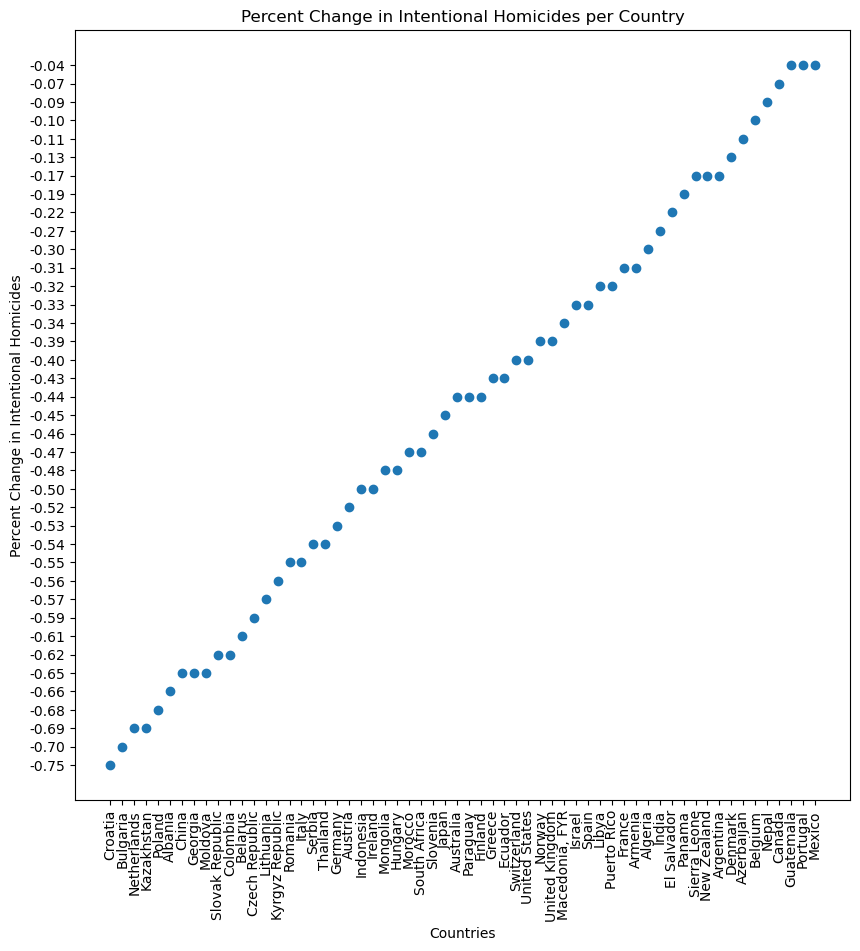

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(Homicide_df_final["Name"],Homicide_df_final["% change earliest to latest data"])
plt.xticks(Homicide_df_final["Name"],rotation=90)
plt.xlabel("Countries")
plt.ylabel("Percent Change in Intentional Homicides")
plt.title("Percent Change in Intentional Homicides per Country")
plt.savefig("Images/Fig1.png")
plt.show()

In [6]:
#Export data from csv
GDP_raw_data=pd.read_csv("GDP_data via country.csv")
Incomegroup_raw=pd.read_csv("Country_via IncomeGroup.csv")

#delete unwanted rows to created the column header, reindex starting from 0
GDP_raw_data=GDP_raw_data.drop([0,1,2])
GDP_raw_data.reset_index(inplace=True,drop=True)

header=GDP_raw_data.iloc[0]
GDP_data=GDP_raw_data[1:]
GDP_data.columns=header

#Merge GDP and Incomegroup data and drop unwanted columns (via column name and index number)
GDP_income_merge=pd.merge(GDP_data, Incomegroup_raw)

GDP_income_merge.drop(columns=["Indicator Name", "Indicator Code","Unnamed: 5", "Region", "SpecialNotes", "TableName"],axis=1, inplace=True)
GDP_income_merge=GDP_income_merge.drop(GDP_income_merge.iloc[:, 2:37], axis=1)
GDP_income_merge_df=GDP_income_merge.drop(GDP_income_merge.iloc[:, 23:30], axis=1)

#Drop missing values column and rows
GDP_income_merge=GDP_income_merge_df.dropna(axis=1,how="all")
GDP_income_merge_drop=GDP_income_merge.dropna()

#Displays all the rows in dataframe and sort in alphabetical order via country name
pd.set_option("display.max_rows", None)
GDP_income_merge_sort=GDP_income_merge_drop.sort_values("Country Name")
GDP_income_merge_sort
GDP_income_merge_sort.reset_index(inplace=True,drop=True)
GDP_income_merge_sort



,Country Name,Country Code,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,IncomeGroup
0,Albania,ALB,750.604449,1009.977114,717.380048,813.789397,1033.242532,1126.683340,1281.659826,1425.124219,...,3595.038302,4370.539711,4114.134041,4094.349699,4437.141146,4247.631356,4413.063397,4578.633208,3952.803584,Upper middle income
1,Algeria,DZA,1466.544691,1619.532403,1634.467410,1610.302968,1602.864915,1780.376071,1754.582365,1794.811114,...,3971.803488,4946.564017,3898.478806,4495.921455,5473.281801,5610.733306,5519.777576,5516.229463,4197.419971,Lower middle income
2,Andorra,AND,18731.650685,19081.537962,18253.085376,18592.243021,18884.171346,21620.468488,22809.087760,24784.963786,...,50562.861207,53721.411328,49750.693670,48237.891173,51428.196955,44902.380765,44747.753864,45680.534990,38885.530324,High income
3,Angola,AGO,399.735558,523.310909,514.309887,423.393453,387.689415,556.884244,527.464118,872.657638,...,3121.348735,4081.717497,3123.698898,3496.784796,4511.153227,4962.552072,5101.983876,5059.080441,3100.830685,Lower middle income
4,Antigua and Barbuda,ATG,8440.034526,9079.481212,9556.832802,10029.477750,10379.160402,11010.197460,10502.938811,10549.666189,...,16006.136111,16457.104063,14530.598690,13404.516016,13117.146941,13686.476585,13350.149137,14004.811212,14861.882707,High income
5,Argentina,ARG,7383.704510,7690.157003,8176.771195,8250.673174,7735.322080,7666.517834,7168.975872,2579.488769,...,7210.595548,8977.506851,8184.389889,10385.964432,12848.740476,13082.664326,13080.254732,12334.798245,13789.060425,Upper middle income
6,Armenia,ARM,441.894002,484.091641,501.156515,584.384267,575.628479,603.298025,676.150011,765.316178,...,3064.279961,3908.949057,2917.366245,3143.029482,3462.681774,3643.715404,3833.157071,4017.229913,3666.141825,Upper middle income
7,Aruba,ABW,17140.433369,17375.225306,18713.425388,19742.316739,19833.826746,21023.157513,20913.299497,21377.095185,...,27665.426465,29011.559245,25739.137251,24452.928363,26044.435933,25609.955724,26515.678080,26942.307976,28421.386493,High income
8,Australia,AUS,20446.719847,22020.079799,23645.057488,21478.385157,20698.712703,21853.449993,19681.645033,20290.780419,...,41023.754856,49681.219074,42810.465839,52132.469608,62598.686618,68047.378178,68156.386105,62515.314832,56708.961197,High income
9,Austria,AUT,30325.849582,29809.076773,26705.478599,27361.875111,27183.475926,24625.600723,24558.763678,26527.593091,...,46915.337400,51919.983575,48153.324020,46903.761585,51442.276246,48564.917335,50731.127254,51786.377175,44195.817595,High income


In [7]:
#Rename columns/column entry
GDP_income_merge_sort=GDP_income_merge_sort.rename(columns={"IncomeGroup":"Country's Income tier"})
GDP_income_merge_group=GDP_income_merge_sort.groupby("Country's Income tier",sort=True, group_keys=True).apply(lambda x: x)

#GDP_income_merge_group
#GDP_income_merge_group.reset_index(inplace=True, drop=True)
GDP_income_merge_group

Country Name Country Code  \
Country's Income tier                                                    
High income           2                           Andorra          AND   
                      4               Antigua and Barbuda          ATG   
                      7                             Aruba          ABW   
                      8                         Australia          AUS   
                      9                           Austria          AUT   
                      11                     Bahamas, The          BHS   
                      12                          Bahrain          BHR   
                      14                         Barbados          BRB   
                      16                          Belgium          BEL   
                      19                          Bermuda          BMU   
                      25                Brunei Darussalam          BRN   
                      32                           Canada          CAN   
                      35                            Chile          CHL   
                      43                          Croatia          HRV   
                      45                           Cyprus          CYP   
                      46                          Czechia          CZE   
                      47                          Denmark          DNK   
                      55                          Estonia          EST   
                      59                          Finland          FIN   
                      60                           France          FRA   
                      61                 French Polynesia          PYF   
                      65                          Germany          DEU   
                      67                           Greece          GRC   
                      68                        Greenland          GRL   
                      73                           Guyana          GUY   
                      76             Hong Kong SAR, China          HKG   
                      77                          Hungary          HUN   
                      78                          Iceland          ISL   
                      83                          Ireland          IRL   
                      84                      Isle of Man          IMN   
                      85                           Israel          ISR   
                      86                            Italy          ITA   
                      88                            Japan          JPN   
                      93                      Korea, Rep.          KOR   
                      94                           Kuwait          KWT   
                      97                           Latvia          LVA   
                      101                   Liechtenstein          LIE   
                      102                       Lithuania          LTU   
                      103                      Luxembourg          LUX   
                      104                Macao SAR, China          MAC   
                      110                           Malta          MLT   
                      117                          Monaco          MCO   
                      124                     Netherlands          NLD   
                      125                   New Caledonia          NCL   
                      126                     New Zealand          NZL   
                      131                          Norway          NOR   
                      132                            Oman          OMN   
                      134                          Panama          PAN   
                      139                          Poland          POL   
                      140                        Portugal          PRT   
                      141                     Puerto Rico          PRI   
                      142                           Qatar          QAT   
                      143                        

In [8]:
#Find average percent change per year of all data values in a column using 'for' loop
column_avg=0
GDP_j=[]
GDP_j1=[]
GDP_sum=[]
#counter=0
for row in GDP_income_merge_sort.iterrows():
    for column in GDP_income_merge_sort.columns[2:23]:
        #counter=counter+1
        GDP_j.append(GDP_income_merge_sort[column])
    Avg_Percent_Increase=((((GDP_j[1]-GDP_j[0])/GDP_j[0])+((GDP_j[2]-GDP_j[1])/GDP_j[1])+((GDP_j[3]-GDP_j[2])/GDP_j[2])+((GDP_j[4]-GDP_j[3])/GDP_j[3])+((GDP_j[5]-GDP_j[4])/GDP_j[4])+((GDP_j[6]-GDP_j[5])/GDP_j[5])+((GDP_j[7]-GDP_j[6])/GDP_j[6])+((GDP_j[8]-GDP_j[7])/GDP_j[7])+((GDP_j[9]-GDP_j[8])/GDP_j[8])+((GDP_j[10]-GDP_j[9])/GDP_j[9])+((GDP_j[11]-GDP_j[10])/GDP_j[10])+((GDP_j[12]-GDP_j[11])/GDP_j[11])+((GDP_j[13]-GDP_j[12])/GDP_j[12])+((GDP_j[14]-GDP_j[13])/GDP_j[13])+((GDP_j[15]-GDP_j[14])/GDP_j[14])+((GDP_j[16]-GDP_j[15])/GDP_j[15])+((GDP_j[17]-GDP_j[16])/GDP_j[16])+((GDP_j[18]-GDP_j[17])/GDP_j[17])+((GDP_j[19]-GDP_j[18])/GDP_j[18])+((GDP_j[20]-GDP_j[19])/GDP_j[19]))/20)*100
    GDP_j1.append(Avg_Percent_Increase)
    
GDP_j1[0]
    
    



0       9.808016
1       6.257869
2       4.214535
3      13.850396
4       3.050531
5       6.127592
6      12.311641
7       2.669728
8       5.919733
9       2.306937
10     17.414265
11      5.765451
12      4.917093
13      7.103717
14      3.658306
15      9.021469
16      2.241522
17      2.185616
18      6.183944
19      5.964444
20      8.563708
21      6.723367
22     12.563623
23      3.943484
24      4.723286
25      4.812199
26      7.309604
27      5.765057
28      3.142681
29      5.884564
30      7.026543
31      3.087387
32      4.157107
33      0.882071
34      8.326223
35      5.660193
36     13.947552
37      5.369582
38      2.851622
39     16.753080
40      7.631341
41      6.700082
42      5.605635
43      5.177618
44      5.438625
45      2.656166
46      6.404497
47      2.437580
48      6.173481
49      3.440276
50      6.816767
51      6.229495
52      7.018223
53      4.557333
54     25.389221
55      9.780907
56      4.523014
57      8.833457
58      4.4001

In [33]:
#Dataframe for Pertinent Categories
Avg_Percent_Increase_df=pd.DataFrame({"Country":GDP_income_merge_sort["Country Name"],"Average % change in GDP per year(1995-2015)":GDP_j1[0], "%change in Homicide rate":Homicide_df_final["% change earliest to latest data"],"Country's Income Tier":GDP_income_merge_sort["Country's Income tier"]})
Avg_Percent_Increase_group=Avg_Percent_Increase_df.groupby("Country's Income Tier",sort=True, group_keys=True).apply(lambda x: x)
Avg_Percent_Change_GDP_Homicide=Avg_Percent_Increase_group.dropna()
Avg_Percent_Change_GDP_Homicide


Country  \
Country's Income Tier                                
High income           2                    Andorra   
                      4        Antigua and Barbuda   
                      7                      Aruba   
                      8                  Australia   
                      9                    Austria   
                      11              Bahamas, The   
                      12                   Bahrain   
                      14                  Barbados   
                      16                   Belgium   
                      19                   Bermuda   
                      25         Brunei Darussalam   
                      32                    Canada   
                      35                     Chile   
                      43                   Croatia   
                      45                    Cyprus   
                      46                   Czechia   
                      47                   Denmark   
                      55                   Estonia   
                      59                   Finland   
                      60                    France   
Low income            27              Burkina Faso   
                      28                   Burundi   
                      33  Central African Republic   
                      34                      Chad   
                      39          Congo, Dem. Rep.   
                      57                  Ethiopia   
Lower middle income   1                    Algeria   
                      3                     Angola   
                      13                Bangladesh   
                      18                     Benin   
                      20                    Bhutan   
                      21                   Bolivia   
                      29                Cabo Verde   
                      30                  Cambodia   
                      31                  Cameroon   
                      38                   Comoros   
                      40               Congo, Rep.   
                      42             Cote d'Ivoire   
                      48                  Djibouti   
                      52          Egypt, Arab Rep.   
                      56                  Eswatini   
Upper middle income   5                  Argentina   
                      6                    Armenia   
                      10                Azerbaijan   
                      15                   Belarus   
                      17                    Belize   
                      22    Bosnia and Herzegovina   
                      23                  Botswana   
                      24                    Brazil   
                      26                  Bulgaria   
                      36                     China   
                      37                  Colombia   
                      41                Costa Rica   
                      44                      Cuba   
                      49                  Dominica   
                      50        Dominican Republic   
                      51                   Ecuador   
                      53               El Salvador   
                      54         Equatorial Guinea   
                      58                      Fiji   

                          Average % change in GDP per year(1995-2015)  \
Country's Income Tier                                                   
High income           2                                      4.214535   
                      4                                      3.050531   
                      7                                      2.669728   
                      8                                      5.919733   
                      9                                      2.306937   
                      11                                     5.765451   
                      12                                     4.917093   
                      14             

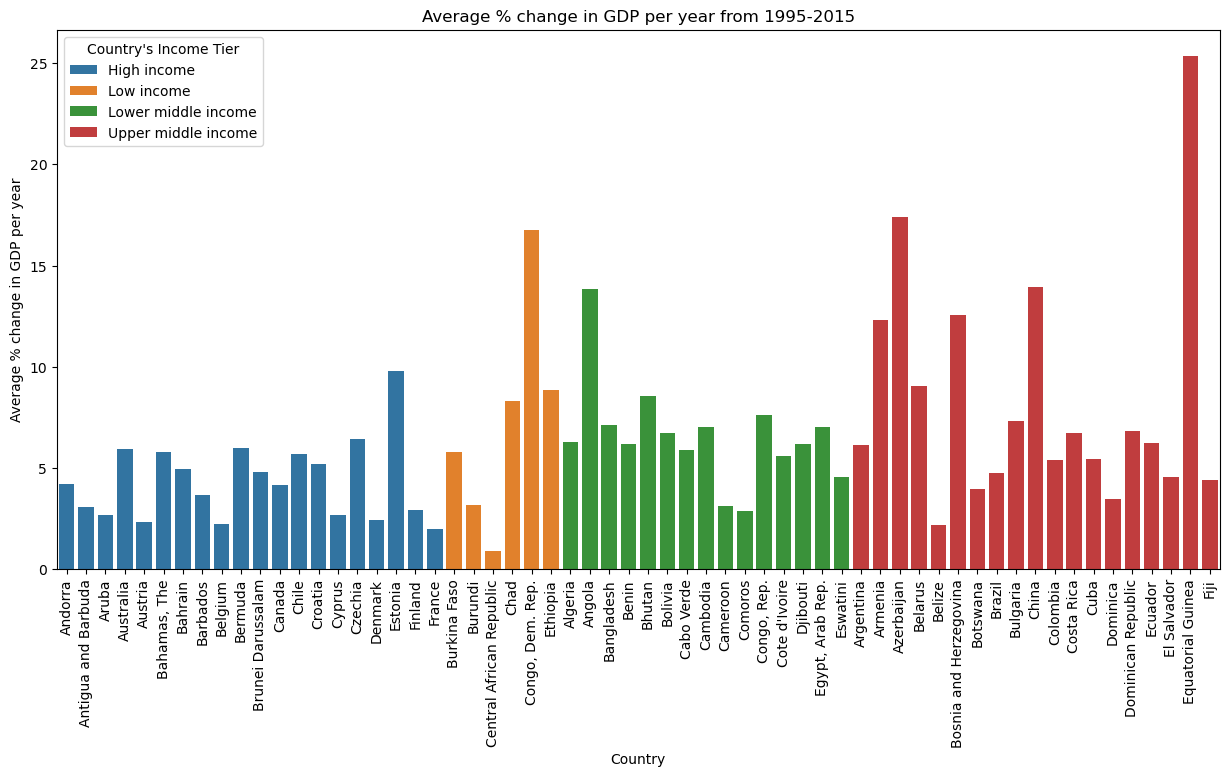

In [30]:
plt.figure(figsize=(15,7))
x_axis=Avg_Percent_Change_GDP_Homicide["Country"]
y_axis=Avg_Percent_Change_GDP_Homicide["Average % change in GDP per year(1995-2015)"]
#plt.bar(x_axis, y_axis, alpha=0.75,align="center", width=0.8)
ax=sns.barplot(x="Country", y="Average % change in GDP per year(1995-2015)", data=Avg_Percent_Change_GDP_Homicide, hue="Country's Income Tier", dodge=False)
plt.xlabel("Country")
plt.ylabel("Average % change in GDP per year")
plt.xticks(rotation="vertical")
plt.title("Average % change in GDP per year from 1995-2015")
plt.savefig("Images/Fig10.png")
plt.show()

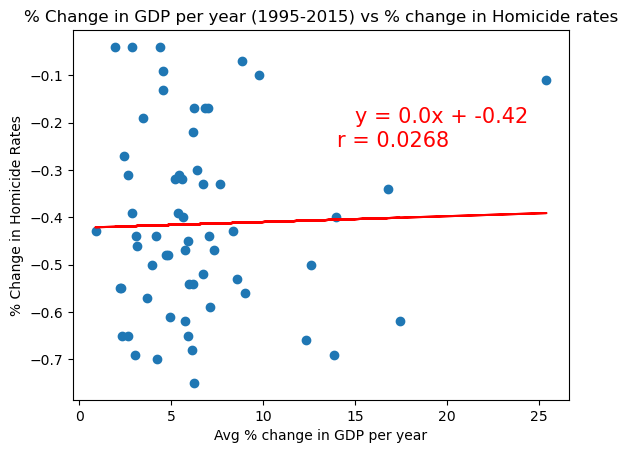

In [11]:
x_axis=Avg_Percent_Change_GDP_Homicide["Average % change in GDP per year(1995-2015)"].astype("float")
y_axis=Avg_Percent_Change_GDP_Homicide["%change in Homicide rate"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = "r = " + str(round(rvalue,4))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(15,-0.2),fontsize=15,color="red")
plt.annotate(r, (14,-0.25), fontsize=15, color="red")
plt.xlabel("Avg % change in GDP per year")
plt.ylabel("% Change in Homicide Rates")
plt.title("% Change in GDP per year (1995-2015) vs % change in Homicide rates")
plt.savefig("Images/Fig11.png")
plt.show()

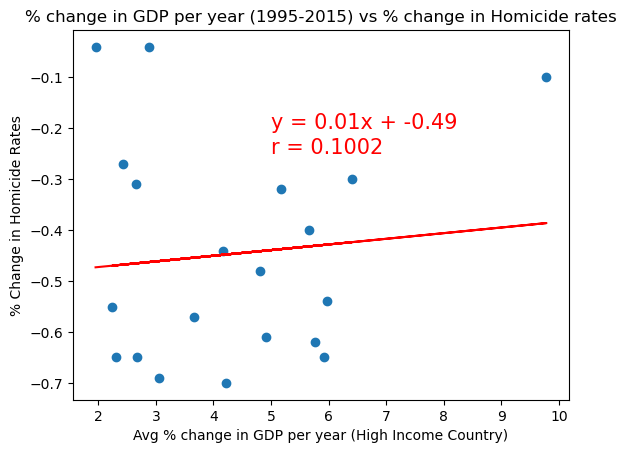

In [12]:
#Scatter plot for the high income countries to determine correlation between GDP and Homicide rates
High_Income=Avg_Percent_Change_GDP_Homicide[Avg_Percent_Change_GDP_Homicide["Country's Income Tier"]=="High income"]
x_axis=High_Income["Average % change in GDP per year(1995-2015)"].astype("float")
y_axis=High_Income["%change in Homicide rate"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = "r = " + str(round(rvalue,4))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,-0.2),fontsize=15,color="red")
plt.annotate(r, (5,-0.25), fontsize=15, color="red")
plt.xlabel("Avg % change in GDP per year (High Income Country)")
plt.ylabel("% Change in Homicide Rates")
plt.title("% change in GDP per year (1995-2015) vs % change in Homicide rates")
plt.savefig("Images/Fig12.png")
plt.show()

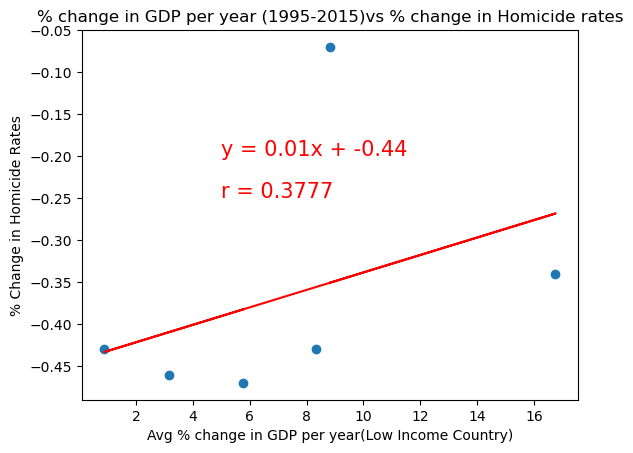

In [13]:
#Scatter plot for the low income countries to determine correlation between GDP and Homicide rates
Low_Income=Avg_Percent_Change_GDP_Homicide[Avg_Percent_Change_GDP_Homicide["Country's Income Tier"]=="Low income"]
x_axis=Low_Income["Average % change in GDP per year(1995-2015)"].astype("float")
y_axis=Low_Income["%change in Homicide rate"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = "r = " + str(round(rvalue,4))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,-0.2),fontsize=15,color="red")
plt.annotate(r, (5,-0.25), fontsize=15, color="red")
plt.xlabel("Avg % change in GDP per year(Low Income Country)")
plt.ylabel("% Change in Homicide Rates")
plt.title("% change in GDP per year (1995-2015)vs % change in Homicide rates")
plt.savefig("Images/Fig13.png")
plt.show()

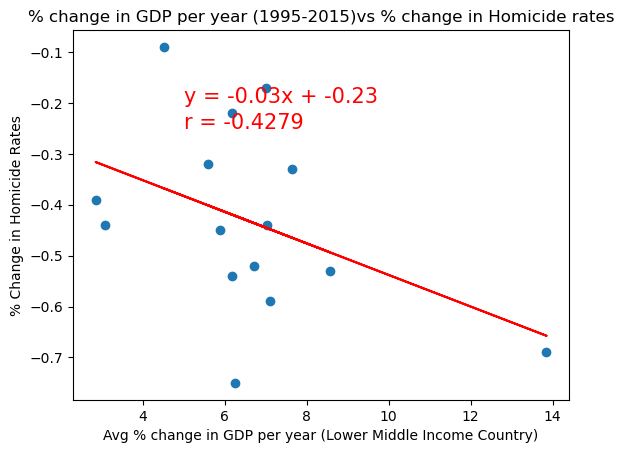

In [14]:
#Scatter plot fot the high income countries to determine correlation between GDP and Homicide rates
Low_middle_Income=Avg_Percent_Change_GDP_Homicide.loc[Avg_Percent_Change_GDP_Homicide["Country's Income Tier"]=="Lower middle income"]
x_axis=Low_middle_Income["Average % change in GDP per year(1995-2015)"].astype("float")
y_axis=Low_middle_Income["%change in Homicide rate"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = "r = " + str(round(rvalue,4))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,-0.2),fontsize=15,color="red")
plt.annotate(r, (5,-0.25), fontsize=15, color="red")
plt.xlabel("Avg % change in GDP per year (Lower Middle Income Country)")
plt.ylabel("% Change in Homicide Rates")
plt.title("% change in GDP per year (1995-2015)vs % change in Homicide rates")
plt.savefig("Images/Fig14.png")
plt.show()

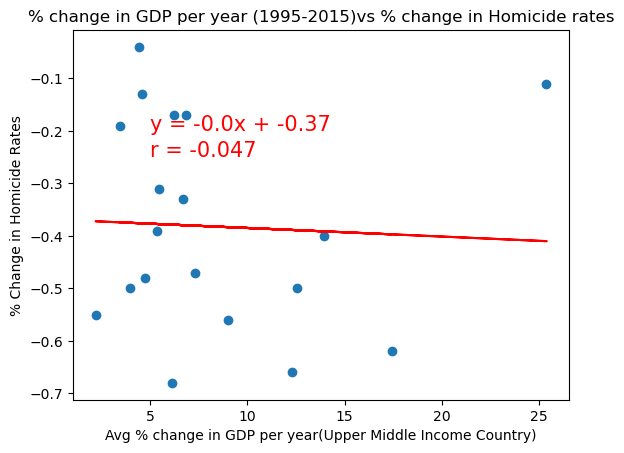

In [15]:
Upper_middle_Income=Avg_Percent_Change_GDP_Homicide.loc[Avg_Percent_Change_GDP_Homicide["Country's Income Tier"]=="Upper middle income"]
x_axis=Upper_middle_Income["Average % change in GDP per year(1995-2015)"].astype("float")
y_axis=Upper_middle_Income["%change in Homicide rate"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = "r = " + str(round(rvalue,4))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,-0.2),fontsize=15,color="red")
plt.annotate(r, (5,-0.25), fontsize=15, color="red")
plt.xlabel("Avg % change in GDP per year(Upper Middle Income Country)")
plt.ylabel("% Change in Homicide Rates")
plt.title("% change in GDP per year (1995-2015)vs % change in Homicide rates")
plt.savefig("Images/Fig15.png")
plt.show()

In [31]:
top_5=Avg_Percent_Change_GDP_Homicide.sort_values("%change in Homicide rate", ascending=False)
top_5.head()


Country  \
Country's Income Tier                          
Lower middle income   1              Algeria   
High income           2              Andorra   
                      4  Antigua and Barbuda   
Lower middle income   3               Angola   
Upper middle income   5            Argentina   

                         Average % change in GDP per year(1995-2015)  \
Country's Income Tier                                                  
Lower middle income   1                                     6.257869   
High income           2                                     4.214535   
                      4                                     3.050531   
Lower middle income   3                                    13.850396   
Upper middle income   5                                     6.127592   

                        %change in Homicide rate Country's Income Tier  
Country's Income Tier                                                   
Lower middle income   1                    -0.75   Lower middle income  
High income           2                    -0.70           High income  
                      4                    -0.69           High income  
Lower middle income   3                    -0.69   Lower middle income  
Upper middle income   5                    -0.68   Upper middle income

In [32]:
bottom_5=Avg_Percent_Change_GDP_Homicide.sort_values("%change in Homicide rate", ascending=True)
bottom_5.head()

Country  \
Country's Income Tier                
Upper middle income   58      Fiji   
High income           60    France   
                      59   Finland   
Low income            57  Ethiopia   
Lower middle income   56  Eswatini   

                          Average % change in GDP per year(1995-2015)  \
Country's Income Tier                                                   
Upper middle income   58                                     4.400193   
High income           60                                     1.953031   
                      59                                     2.886309   
Low income            57                                     8.833457   
Lower middle income   56                                     4.523014   

                         %change in Homicide rate Country's Income Tier  
Country's Income Tier                                                    
Upper middle income   58                    -0.04   Upper middle income  
High income           60                    -0.04           High income  
                      59                    -0.04           High income  
Low income            57                    -0.07            Low income  
Lower middle income   56                    -0.09   Lower middle income

In [34]:
top_5_GDP=Avg_Percent_Change_GDP_Homicide.sort_values("Average % change in GDP per year(1995-2015)", ascending=False)
top_5_GDP.head()

Country  \
Country's Income Tier                         
Upper middle income   54  Equatorial Guinea   
                      10         Azerbaijan   
Low income            39   Congo, Dem. Rep.   
Upper middle income   36              China   
Lower middle income   3              Angola   

                          Average % change in GDP per year(1995-2015)  \
Country's Income Tier                                                   
Upper middle income   54                                    25.389221   
                      10                                    17.414265   
Low income            39                                    16.753080   
Upper middle income   36                                    13.947552   
Lower middle income   3                                     13.850396   

                         %change in Homicide rate Country's Income Tier  
Country's Income Tier                                                    
Upper middle income   54                    -0.11   Upper middle income  
                      10                    -0.62   Upper middle income  
Low income            39                    -0.34            Low income  
Upper middle income   36                    -0.40   Upper middle income  
Lower middle income   3                     -0.69   Lower middle income

In [35]:
bottom_5_GDP=Avg_Percent_Change_GDP_Homicide.sort_values("Average % change in GDP per year(1995-2015)", ascending=True)
bottom_5_GDP.head()

Country  \
Country's Income Tier                                
Low income            33  Central African Republic   
High income           60                    France   
Upper middle income   17                    Belize   
High income           16                   Belgium   
                      9                    Austria   

                          Average % change in GDP per year(1995-2015)  \
Country's Income Tier                                                   
Low income            33                                     0.882071   
High income           60                                     1.953031   
Upper middle income   17                                     2.185616   
High income           16                                     2.241522   
                      9                                      2.306937   

                         %change in Homicide rate Country's Income Tier  
Country's Income Tier                                                    
Low income            33                    -0.43            Low income  
High income           60                    -0.04           High income  
Upper middle income   17                    -0.55   Upper middle income  
High income           16                    -0.55           High income  
                      9                     -0.65           High income

#                                    # Homicide Rates & GDP

The third question that we explored was the correlation between homicide rates and economic growth
(key identifier:GDP). According to literature, crime as a whole imposes significant direct and indirect 
cost to society and tends to impede economic progress. There is a relationship between crime and 
economic growth but what about a specific type of crime: homicide? Does an increase in homicide affect 
economic growth or vice versa.  In order to conduct our analysis, we extracted data from world bank (GDP Data),
cleaned and merged the data using python to reflect pertinent information. The GDP data and Homicide rates data 
was analyzed by average  % change in GDP/homicides per year . We hypothesized that the decrease in homicide
rate from 1995-2015 can be attributed to an increase in Gross Domestic Product (GDP) over that span. 
In other words, we expect a moderate to strong negative correlation (-1<r<-0.5). According to the graphical 
analysis, it appears that the decrease in homicide rate over the 20 years span is not correlated to GDP since 
all the scatter plots (as a whole and grouped by Country’s income level)  showed  a weak to no correlation as 
indicated by the coefficient of correlation (r). Thus, the evidence does not support our hypothesis.